In [1]:
import pandas as pd
import os
from plotnine import *
import numpy as np

In [2]:
df = pd.read_excel("Local Inclusionary Housing Policies.xlsx",sheet_name="data",skiprows=1)
df['Government Name'] = df['Government Name'].str.replace("City of","").str.replace("City","").str.strip()
df.head()

,IHID,Program ID,Program Name,Government Name,Government Type,Census ID,Census Type,Government Address: Street,Government Address: City,Government Address: County,...,Commercial Development Exemptions,Residential Development Type,Rental Fee Rate,Single Family For-Sale Fee Rate,Multifamily For-Sale Fee Rate,Townhouse For-Sale Fee Rate,Alternative Compliance Option,Fee Amount - Residential Development,Fees Amount - Commercial Development,Total Affordable Units.1
0,18,"Carlsbad, CA: Inclusionary Housing",Inclusionary Housing,Carlsbad,Town or city,1600000US0611194,Place,1635 Faraday Avenue,Carlsbad,San Diego,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,"Foster City, CA: Below Market Rate Inclusionar...",Below Market Rate Inclusionary Housing,Foster,Town or city,1600000US0625338,Place,610 Foster City Blvd.,Foster City,San Mateo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,113,"Huntington Beach, CA: Affordable Housing",Affordable Housing,Huntington Beach,Town or city,1600000US0636000,Place,2000 Main Street,Huntington Beach,Orange,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,176,"San Diego, CA: Inclusionary Affordable Housing...",Inclusionary Affordable Housing Regulations,San Diego,Town or city,1600000US0666000,Place,"1122 Broadway, Ste 300",San Diego,San Diego,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,947,"Portland, OR: Inclusionary Zoning Program",Inclusionary Zoning Program,Portland,Town or city,1600000US4159000,Place,"1900 SW 4th Ave, Suite 7100, Portland, OR 97201",Portland,OR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_2 = df[df['Minimum Project Size'].notna()].copy()
df_2.shape

(632, 68)

In [4]:
df_2['Minimum Project Size'].unique()

array(['7 units', '5 units', '3 units', '10 units', '20 units', '1 unit',
       '30 units', "Don't know", '2 units', '25 units',
       '5 units (rental), 20 units (ownership)', '6 units',
       '10 units (rental), 9 units (ownership)', '4 units', '15 units',
       '8 units', '5 units (rental), 2 units (ownership)', '11 units',
       '3,500 sqft (building)', '16 units', '35 units', '100 units',
       '50 units', '12 units', '13 units', '6 acres (parcel)',
       '8 acres (parcel)', '2 acres (parcel)', '10 acres (parcel)',
       '5 acres (parcel)', '7 acres (parcel)', '1 million sqft (parcel)',
       '20,000 sqft (building)', '24 units',
       'Density per acre minimums - 6 single fam, 10 duplex, 20 multi-fam',
       '10 Units', 'N/A ', '12 Units', '3 Units', '4 Units', '5 Units'],
      dtype=object)

In [5]:
df_3 = df_2[df_2['Minimum Project Size'].str.lower().str.contains("units")].copy()
df_3.head()

,IHID,Program ID,Program Name,Government Name,Government Type,Census ID,Census Type,Government Address: Street,Government Address: City,Government Address: County,...,Commercial Development Exemptions,Residential Development Type,Rental Fee Rate,Single Family For-Sale Fee Rate,Multifamily For-Sale Fee Rate,Townhouse For-Sale Fee Rate,Alternative Compliance Option,Fee Amount - Residential Development,Fees Amount - Commercial Development,Total Affordable Units.1
0,18,"Carlsbad, CA: Inclusionary Housing",Inclusionary Housing,Carlsbad,Town or city,1600000US0611194,Place,1635 Faraday Avenue,Carlsbad,San Diego,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,"Foster City, CA: Below Market Rate Inclusionar...",Below Market Rate Inclusionary Housing,Foster,Town or city,1600000US0625338,Place,610 Foster City Blvd.,Foster City,San Mateo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,113,"Huntington Beach, CA: Affordable Housing",Affordable Housing,Huntington Beach,Town or city,1600000US0636000,Place,2000 Main Street,Huntington Beach,Orange,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,176,"San Diego, CA: Inclusionary Affordable Housing...",Inclusionary Affordable Housing Regulations,San Diego,Town or city,1600000US0666000,Place,"1122 Broadway, Ste 300",San Diego,San Diego,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,947,"Portland, OR: Inclusionary Zoning Program",Inclusionary Zoning Program,Portland,Town or city,1600000US4159000,Place,"1900 SW 4th Ave, Suite 7100, Portland, OR 97201",Portland,OR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_pops = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
df_pops = df_pops[df_pops['Population']>=200000][['City','State','Population']]
df_pops.head()

,City,State,Population
2,Cleveland,Ohio,390113
9,Boise City,Idaho,214237
20,Lubbock,Texas,239538
25,Kansas City,Missouri,467007
30,Montgomery,Alabama,201332


In [7]:
df_pops[df_pops['State']=='New Jersey']

,City,State,Population
269,Newark,New Jersey,278427
665,Jersey City,New Jersey,257342


In [8]:
df_merged = df_3.merge(df_pops,how='inner',left_on='Government Name',right_on='City').sort_values("Population",ascending=False)
df_merged[['Program ID','Population','Year Program Adopted','Year Program Updated','Program Applicable Areas','Minimum Project Size','Minimum Set-aside','Incentive','Affordable Housing Compliance Option','Total Affordable Units']]

,Program ID,Population,Year Program Adopted,Year Program Updated,Program Applicable Areas,Minimum Project Size,Minimum Set-aside,Incentive,Affordable Housing Compliance Option,Total Affordable Units
25,"New York, NY: 421-a Exemption",8405837,1985,2017,Entire jurisdiction,2 units,25% of total project units. And the set-aside ...,Tax relief/abatement,On-site units,"At least 42,406 through 2016"
17,"Chicago, IL: Affordable Requirements Ordinance",2718782,Don't know,Don't know,"Certain zones, neighborhoods, or districts",6 units,10% of total project units,None,On-site units,Don't know
0,"San Diego, CA: Inclusionary Affordable Housing...",1355896,2003,2011,Entire jurisdiction,10 units,10% of total project units,None,"On-site units, off-site units, rehab regulated...",Don't know
10,"San Jose, CA: Inclusionary Housing Ordinance",998537,2010,Don't know,Entire jurisdiction,20 units,15% of total project units,"Density bonus, other zoning variance","On-site units, off-site units, renovate unregu...",Don't know
27,"Columbus, OH: Affordable housing and community...",822553,2018,Don't know,"Certain zones, neighborhoods, or districts",4 units,20% of total project units,Tax relief/abatement,"On-site units, in-lieu fee",Don't know
20,"Detroit, MI: Inclusionary housing",688701,2017,Don't know,Entire jurisdiction,20 units,20% of total project units. And the set-aside ...,"Tax relief/abatement, direct subsidy/TIF, other","On-site units, off-site units, in-lieu fee",At least 50
29,"City of Seattle, WA: Multifamily Tax Exemption...",652405,1998,2015,"Certain zones, neighborhoods, or districts",4 units,20% of total project units. And the set-aside ...,Tax relief/abatement,On-site units,5920
28,"City of Seattle, WA: Mandatory Housing Afforda...",652405,2015,2019,"Certain zones, neighborhoods, or districts",3 units,5% of building sqft. And the set-aside require...,None,"On-site units, off-site units, in-lieu fee",0
5,"Denver, CO: Mandatory Affordable Housing for R...",649495,2022,Don't know,Entire jurisdiction,30 units,8% of total project units. And the set-aside r...,"Density bonus, other zoning variance, expedite...","On-site units, in-lieu fee",Don't know
11,"Washington, D.C.: Inclusionary Zoning",646449,2009,Don't know,"Certain zones, neighborhoods, or districts",10 units,8% of building sqft. And the set-aside require...,Density bonus,On-site units,1036


# Combining with Building Data

In [9]:
os.listdir("../data/")

['NJ_Construction_Permit_Data.csv',
 'minneapolis_permits.csv',
 '.DS_Store',
 'Cook_appraisals.csv',
 'MD_properties.csv',
 'DC_condo_appraisals.csv',
 'MD_appraisal_details.csv',
 'wa_apartments_dot_com_listings.csv',
 'MD_appraisals.csv',
 'PDX_Residential_Building_Permits.csv',
 'DC_appraisals.csv',
 'SF_Building_Permits.csv']

In [10]:
df_nj = pd.read_csv("../data/NJ_Construction_Permit_Data.csv",
                    usecols = ['Municipality Name','MuniType','County',
                                   'Permit Status Description','Permit Date','Certificate Date',
                                   'Permit Type Description','Certificate Type Description',
                                   'Sale Units Gained','Rental Units Gained','Use Group Description'])
df_nj['Units Gained'] = df_nj['Sale Units Gained']+df_nj['Rental Units Gained']
df_nj = df_nj[df_nj['Units Gained']>=2].copy()
print(df_nj.shape)
df_nj.head()

(7641, 12)


,Municipality Name,MuniType,County,Permit Status Description,Permit Date,Certificate Date,Permit Type Description,Certificate Type Description,Sale Units Gained,Rental Units Gained,Use Group Description,Units Gained
104,ABSECON,CITY,ATLANTIC,Certificate,01/11/2016,08/22/2018,New,Certificate of Occupancy,0,36,"Multiple family dwellings, dormitories, etc.",36
105,ABSECON,CITY,ATLANTIC,Certificate,01/11/2016,05/21/2018,New,Certificate of Occupancy,0,24,"Multiple family dwellings, dormitories, etc.",24
116,ABSECON,CITY,ATLANTIC,Certificate,02/10/2016,05/11/2018,New,Certificate of Occupancy,0,38,"Multiple family dwellings, dormitories, etc.",38
136,ABSECON,CITY,ATLANTIC,Certificate,03/02/2016,05/24/2018,New,Certificate of Occupancy,0,38,"Multiple family dwellings, dormitories, etc.",38
137,ABSECON,CITY,ATLANTIC,Certificate,06/01/2016,04/24/2018,New,Certificate of Occupancy,0,33,"Multiple family dwellings, dormitories, etc.",33


In [11]:
df_sf = pd.read_csv("../data/SF_Building_Permits.csv",
                   usecols = ['Permit Type Definition','Description','Existing Use','Proposed Use',
                              'Permit Creation Date',
                             'Current Status',
                              'Current Status Date',
                              'Filed Date','Issued Date','Completed Date','First Construction Document Date',
                             'Existing Units','Proposed Units'])
#df_sf = df_sf[(df_sf['Proposed Units']>=3)&(df_sf['Proposed Units']!=df_sf['Existing Units'])].copy()
df_sf['Permit Creation Date'] = pd.to_datetime(df_sf['Permit Creation Date'])
print(df_sf.shape)
df_sf.head()

<ipython-input-11-8e06bdab2bac>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.


(1197354, 13)


,Permit Type Definition,Permit Creation Date,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Existing Use,Existing Units,Proposed Use,Proposed Units
0,otc alterations permit,1986-01-08,install aluminum windows,complete,01/29/1986,01/08/1986,01/08/1986,01/29/1986,NaN,2 family dwelling,2.0,2 family dwelling,2.0
1,otc alterations permit,2020-07-21,revision to app#201806222690. seismic retrofit...,filed,07/21/2020,07/21/2020,NaN,NaN,NaN,apartments,12.0,apartments,12.0
2,demolitions,1997-09-18,demolish a 12 story multi unit structure,expired,08/31/1999,09/18/1997,10/15/1997,NaN,NaN,apartments,0.0,NaN,NaN
3,additions alterations or repairs,2019-11-18,legalization of unpermitted unit per ordiance ...,filed,11/18/2019,11/18/2019,NaN,NaN,NaN,2 family dwelling,2.0,apartments,3.0
4,additions alterations or repairs,2018-06-05,legalize (e) dwelling unit at 1st flr per ord#...,approved,01/12/2022,06/05/2018,NaN,NaN,NaN,apartments,24.0,apartments,25.0


In [12]:
df_pd = pd.read_csv("../data/PDX_Residential_Building_Permits.csv",
                   usecols = ['STATUS','YEAR_','NEWCLASS','NEWTYPE','NEW_UNITS','IS_ADU'])
df_pd = df_pd[(df_pd['NEW_UNITS']>=2)&(df_pd['IS_ADU']==False)].drop("IS_ADU",axis=1).copy()
print(df_pd.shape)
df_pd.head()

(3936, 5)


,STATUS,YEAR_,NEWCLASS,NEWTYPE,NEW_UNITS
12,Final,1995,New Construction,Rowhouse,2
32,Final,1995,Move,Duplex,2
33,Final,1996,Move,Duplex,2
34,Final,1995,New Construction,Duplex,2
35,Final,1995,New Construction,Duplex,2


In [13]:
df_dc = pd.read_csv("../data/DC_appraisals.csv",usecols=['NUM_UNITS','AYB','YR_RMDL','EYB'])
df_dc_2 = pd.read_csv("../data/DC_condo_appraisals.csv",usecols=['CMPLX_NUM','BLDG_NUM','AYB','YR_RMDL','EYB'])
print(df_dc.shape)
df_dc_2.shape
df_dc.head()

(108406, 4)


,NUM_UNITS,AYB,YR_RMDL,EYB
0,2.0,1900.0,2013.0,1976
1,3.0,1906.0,2004.0,1976
2,1.0,1900.0,1989.0,1976
3,2.0,1800.0,2020.0,1976
4,1.0,1906.0,2007.0,1982


In [14]:
df_dc_2 = df_dc_2.groupby(by=['CMPLX_NUM','BLDG_NUM'])['AYB'].agg([np.median,len]).reset_index()
df_dc_2.columns = ['complex_num','bldg_num','AYB','NUM_UNITS']
print(df_dc_2.shape)
df_dc_2.head()

(3890, 4)


,complex_num,bldg_num,AYB,NUM_UNITS
0,1001,1,2017.0,95
1,1002,1,1978.0,156
2,1003,1,1900.0,16
3,1004,1,1910.0,21
4,1005,1,1893.0,3


In [102]:
df_cc = pd.read_csv("../data/Cook_appraisals.csv",usecols=['PIN','Property Address','Town Code','Census Tract','Number of Units','Age','Apartments'])
# Age = 10 could mean NA, need to figure out how to distinguish, maybe just drop
# Why are there dupes based on address?
# Why does it say Northern Trienniel only in the description but the data appears to include Chicago?
df_cc = df_cc[df_cc['Number of Units']>=2].drop_duplicates("Property Address").copy()
print(df_cc.shape)
df_cc.head()

(101296, 7)


,PIN,Town Code,Apartments,Census Tract,Property Address,Age,Number of Units
46,1011010301025,10,NaN,804202.0,100 E STATION ST BARRINGTON,10,48.0
265,1011230761002,10,NaN,804201.0,620 S HOUGH ST BARRINGTON,60,12.0
372,1011230771001,10,NaN,804201.0,640 S HOUGH ST BARRINGTON,39,2.0
373,1011230771002,10,NaN,804201.0,642 S HOUGH ST BARRINGTON,39,2.0
465,1012030251003,10,NaN,804202.0,236 GEORGE ST BARRINGTON,32,4.0


In [107]:
# Need to confirm that 2010 census tracts are used in data, because that's what I'm using to filter to Chicago:
df_chi_tracts = pd.read_csv("../data/chicago_census_tracts.csv",usecols=['TRACTCE10'])
df_cc['Chicago'] = df_cc['Census Tract'].isin(df_chi_tracts['TRACTCE10'].values).astype(int)
df_chi = df_cc.dropna(subset=["Census Tract"]).merge(df_chi_tracts,how='inner',left_on='Census Tract',right_on='TRACTCE10')
print(df_chi.shape)
df_chi.head()

(25138, 10)


,PIN,Town Code,Apartments,Census Tract,Property Address,Age,Number of Units,n_units,Chicago,TRACTCE10
0,10362100471027,75,NaN,20302.0,2700 W LUNT AVE,60,40.0,40.0,1,20302
1,10362100471024,75,NaN,20302.0,2708 W LUNT AVE,60,40.0,40.0,1,20302
2,10362100471025,75,NaN,20302.0,2710 W LUNT AVE,60,40.0,40.0,1,20302
3,10362100471008,75,NaN,20302.0,2704 W LUNT AVE,60,40.0,40.0,1,20302
4,10362000461007,75,NaN,20302.0,2729 W TOUHY AVE,41,6.0,6.0,1,20302


In [16]:
# Building units column is almost always null
df_md = pd.read_csv("../data/MD_appraisals.csv",usecols=['CM_BLDUNTS','OBJECTID','CT2010'])
#df_md_2 = pd.read_csv("../data/MD_appraisal_details.csv",usecols=['OBJECTID','BL_YEARBLT','JURSCODE'])
#df_md = df_md[df_md['CM_BLDUNTS']>=2].copy()
#df_md = df_md.merge(df_md_2,on='OBJECTID',how='inner')
#print(df_md.shape)
#df_md.head()

In [17]:
# Building units still almost always null
# https://data.imap.maryland.gov/datasets/maryland::maryland-property-data-parcel-points/about
df_md_alt = pd.read_csv("../data/MD_properties.csv",usecols=['JURSCODE',
                        'CT2010','CITY','BLDG_UNITS','YEARBLT'])
print(df_md_alt.shape)
df_md_alt.head()

(2357494, 5)


,JURSCODE,CT2010,CITY,YEARBLT,BLDG_UNITS
0,WORC,2.404795e+10,POCOMOKE CITY,2014.0,NaN
1,WORC,2.404795e+10,POCOMOKE CITY,1992.0,NaN
2,WORC,2.404795e+10,POCOMOKE CITY,NaN,NaN
3,WORC,2.404795e+10,POCOMOKE CITY,1995.0,NaN
4,WORC,2.404795e+10,POCOMOKE CITY,1976.0,NaN


In [25]:
df_md_alt['BLDG_UNITS'].isna().sum()

2353209

In [19]:
df_md_alt.columns[80:]

Index([], dtype='object')

In [20]:
df_md['CM_BLDUNTS'].notna().sum()

13957

In [23]:
#df_md['JURSCODE'].value_counts().head(20)

In [36]:
df_mn = pd.read_csv("../data/minneapolis_permits.csv",usecols=['Neighborhoods_Desc','dwellingUnitsNew',
                                                              'dwellingUnitsEliminated','permitType',
                                                              'occupancyType','workType','status','milestone',
                                                              'value','issueDate','completeDate'])
df_mn = df_mn.query("dwellingUnitsNew>=2")
print(df_mn.shape)
df_mn.head()

(390, 11)


,Neighborhoods_Desc,dwellingUnitsNew,dwellingUnitsEliminated,permitType,occupancyType,workType,status,milestone,value,issueDate,completeDate
1094,Elliot Park,172.0,0.0,Commercial,Comm,Remodel,Issued,Inspection,34376259.00,2022/01/24 09:58:32+00,NaN
1430,North Loop,109.0,0.0,Commercial,Mixed,New,Closed,Closed,15458805.00,2019/08/29 15:38:09+00,2021/08/13 12:21:32+00
1597,St. Anthony West,49.0,0.0,Commercial,MFD,New,Issued,Inspection,8189900.00,2022/04/26 09:08:54+00,NaN
1605,Como,2.0,0.0,Res,TFD,New,Closed,Closed,403494.00,2019/11/21 12:44:17+00,2020/09/14 09:12:18+00
1615,Como,2.0,1.0,Res,TFD,Conversion,Open,Final Inspection,30671.45,2022/01/31 11:45:30+00,NaN


In [ ]:
df_3.head()

# EDA

In [198]:
def plot_unit_dist(data,unit_col='Units',vline=None,title=''):
    data = data.copy()
    data[unit_col] = data[unit_col].astype(int)
    counts = pd.DataFrame(data[unit_col].value_counts()).reset_index()
    counts.columns = ['Units','Freq']
    plot = (ggplot(counts,aes(x='Units',y='Freq')) + 
           geom_bar(stat='identity') + 
            scale_x_continuous(breaks=list(range(data[unit_col].min(),data[unit_col].max()+5,5))) + 
           labs(title = title,x='Number of Units per Building',y='Number of Buildings'))
    if vline is not None:
        plot += geom_vline(xintercept=vline,linetype='dashed')
    return(plot)

## NJ

In [199]:
df_nj['Municipality Name'].value_counts().head()

ELIZABETH      974
JERSEY CITY    920
NEWARK         355
LAKEWOOD       326
PATERSON       241
Name: Municipality Name, dtype: int64

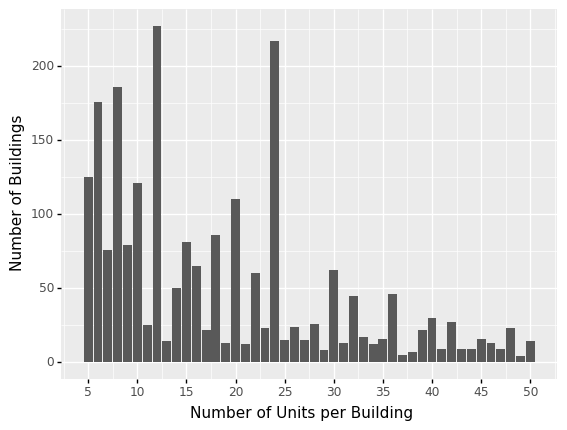

<ggplot: (8792932126389)>

In [200]:
plot_unit_dist(df_nj[(df_nj['Units Gained']<=50)&(df_nj['Units Gained']>=5)],'Units Gained')

In [201]:
df_newark = df_nj[df_nj['Municipality Name']=='NEWARK']
df_newark.head()

,Municipality Name,MuniType,County,Permit Status Description,Permit Date,Certificate Date,Permit Type Description,Certificate Type Description,Sale Units Gained,Rental Units Gained,Use Group Description,Units Gained
914723,NEWARK,CITY,ESSEX,Permit,01/04/2019,NaN,Alteration,NaN,0,3,"Multiple family dwellings, dormitories, etc.",3
915067,NEWARK,CITY,ESSEX,Certificate,07/16/2013,11/03/2017,New,Certificate of Occupancy,0,60,Mercantile buildings,60
915068,NEWARK,CITY,ESSEX,Certificate,06/07/2013,11/14/2017,New,Certificate of Occupancy,0,40,Mercantile buildings,40
915070,NEWARK,CITY,ESSEX,Certificate,10/03/2013,05/16/2018,New,Certificate of Occupancy,0,10,Mercantile buildings,10
915173,NEWARK,CITY,ESSEX,Certificate,09/22/2014,09/12/2019,New,Certificate of Occupancy,2,0,"One and two family units, 5 lodgers or less each",2


In [202]:
df_newark['Units Gained'].value_counts().sort_index().head(25)

2      99
3     156
4      28
5       4
6       1
7       1
9       4
10      2
12      1
13      1
14      1
15      5
16      2
17      1
18      5
20      1
22      3
23      2
24      2
29      1
32      1
40      2
42      2
50      1
57      1
Name: Units Gained, dtype: int64

## SF

In [223]:
df_sf['post_prop_c'] = (df_sf['Permit Creation Date']>='06/07/2016').astype(int)
df_sf_2 = df_sf[(df_sf['Proposed Units']<=50)&(df_sf['Proposed Units']>=5)&(df_sf['Permit Type Definition'].str.contains("new construction"))].copy()
print(df_sf.shape)
print(df_sf_2.shape)
df_sf_2.head()

(1197354, 14)
(2074, 14)


,Permit Type Definition,Permit Creation Date,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Existing Use,Existing Units,Proposed Use,Proposed Units,post_prop_c
20,new construction wood frame,2016-02-29,"phase 2b, building i. \nto erect 3 stories, no...",issued,08/06/2021,02/29/2016,08/06/2021,NaN,NaN,NaN,NaN,apartments,15.0,0
21,new construction wood frame,2016-03-29,"bldg k-2. to erect 3 stories, no basement, typ...",issued,08/30/2021,03/29/2016,08/30/2021,NaN,NaN,NaN,NaN,apartments,11.0,0
22,new construction,2016-04-14,(bldg q) to erect 4 stories of 39 dwellings wi...,issued,10/05/2020,04/14/2016,10/05/2020,NaN,01/19/2022,NaN,NaN,apartments,39.0,0
205,new construction wood frame,2014-12-16,"bldg 1: construct (n) 4-story, 18 units reside...",issued,09/21/2015,12/16/2014,09/21/2015,NaN,NaN,NaN,NaN,apartments,18.0,0
206,new construction wood frame,2014-12-16,"bldg 2: construct (n) 3-story, 8 units residen...",issued,09/21/2015,12/16/2014,09/21/2015,NaN,NaN,NaN,NaN,apartments,8.0,0


In [224]:
df_sf_2['Permit Creation Date'].min()

Timestamp('1977-10-19 00:00:00')

In [225]:
df_sf_2['Permit Creation Date'].max()

Timestamp('2022-09-27 00:00:00')

In [226]:
df_sf_2['Current Status'].value_counts()

complete       1352
expired         160
issued          149
cancelled       132
filed           121
withdrawn       100
approved         33
reinstated       12
filing           10
disapproved       4
suspend           1
Name: Current Status, dtype: int64

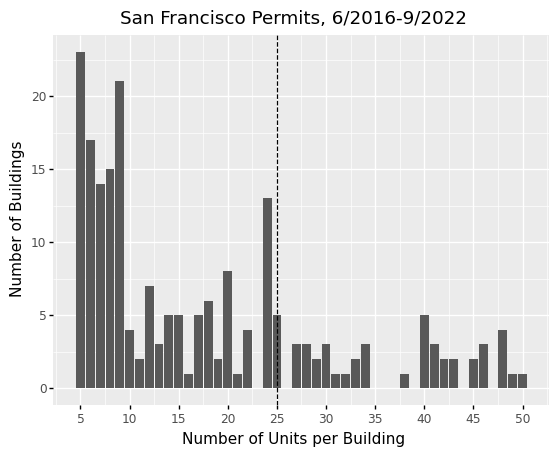

<ggplot: (8792789464046)>

In [227]:
plot_unit_dist(df_sf_2.query("post_prop_c==1"),unit_col='Proposed Units',vline=25,
              title = 'San Francisco Permits, 6/2016-9/2022')

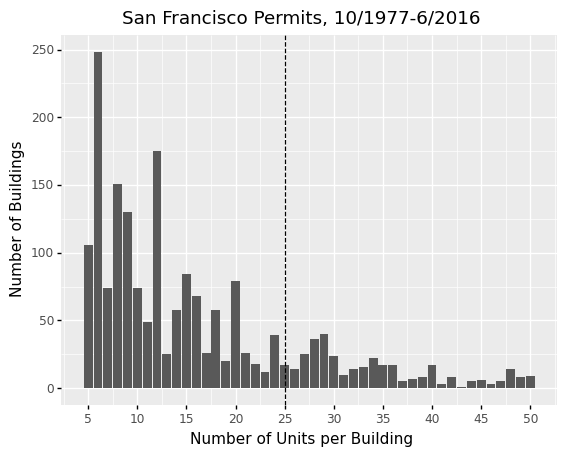

<ggplot: (8792796114029)>

In [229]:
plot_unit_dist(df_sf_2.query("post_prop_c==0"),unit_col='Proposed Units',vline=25, 
               title = 'San Francisco Permits, 10/1977-6/2016')

## Portland

In [209]:
df_pd['YEAR_'].describe()

count    3936.000000
mean     2006.692581
std         7.995298
min      1995.000000
25%      2000.000000
50%      2005.000000
75%      2015.000000
max      2022.000000
Name: YEAR_, dtype: float64

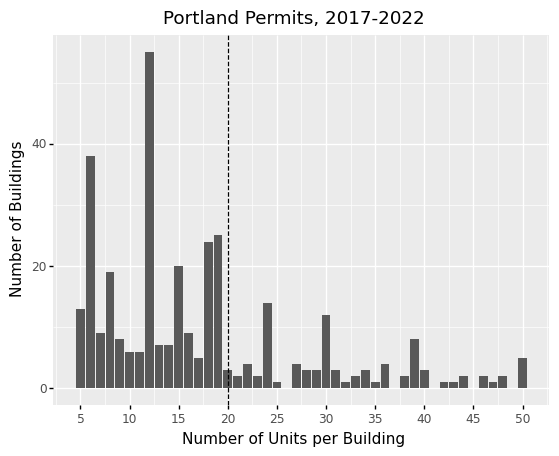

<ggplot: (8792795607128)>

In [210]:
plot_unit_dist(df_pd.query("NEW_UNITS>=5&NEW_UNITS<=50&YEAR_>=2017"),"NEW_UNITS",vline=20,
              title = "Portland Permits, 2017-2022")

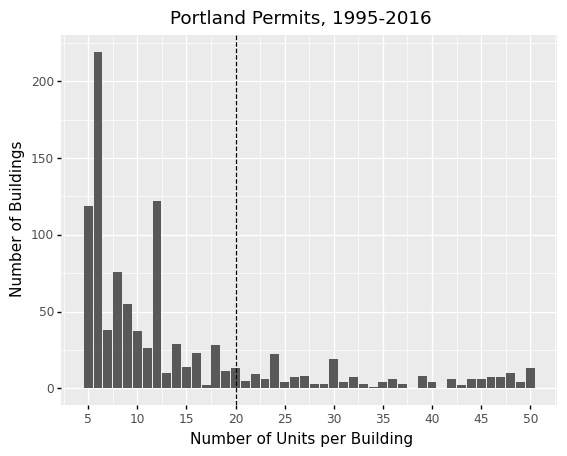

<ggplot: (8792937109586)>

In [211]:
plot_unit_dist(df_pd.query("NEW_UNITS>=5&NEW_UNITS<=50&YEAR_<2017"),"NEW_UNITS",vline=20,
              title = "Portland Permits, 1995-2016")

## DC

In [212]:
# AYB: The earliest time the main portion of the building was built. It is not affected by subsequent construction.
# EYB: The calculated or apparent year that an improvement was built that is most often more recent than actual year built.
# YR_RMDL: Last year residence was remodeled.
df_dc.head()

,NUM_UNITS,AYB,YR_RMDL,EYB
0,2.0,1900.0,2013.0,1976
1,3.0,1906.0,2004.0,1976
2,1.0,1900.0,1989.0,1976
3,2.0,1800.0,2020.0,1976
4,1.0,1906.0,2007.0,1982


In [213]:
df_dc_3 = df_dc_2[df_dc_2['AYB']>=2009].copy()
print(df_dc_3.shape)
df_dc_3['NUM_UNITS'].value_counts().sort_index().head(20)

(593, 4)


2     213
3      21
4      77
5      28
6      37
7      17
8      32
9      24
10     13
11      6
12     11
13      4
14      9
15      6
16      7
17      1
18      6
19      2
20      9
22      4
Name: NUM_UNITS, dtype: int64

## MN

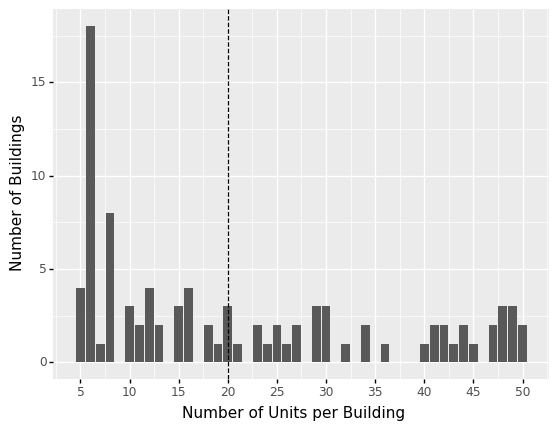

<ggplot: (8792763301750)>

In [214]:
plot_unit_dist(df_mn.query("dwellingUnitsNew<=50&dwellingUnitsNew>=5"),"dwellingUnitsNew",vline=20)

## Chicago

In [215]:
# compare Chicago vs. rest of Cook County
# compare pre-2007 to post-2007 (eliminating when age = 10 / missing)

In [216]:
df_cc['Chicago'].value_counts()

0    76158
1    25138
Name: Chicago, dtype: int64

In [217]:
df_cc['n_units'] = df_cc['Apartments'].fillna(0)+df_cc['Number of Units'].fillna(0)
df_cc_2 = df_cc.query("Age!=10&n_units<=40&n_units>=4")[['Age','n_units','Chicago']]
print(df_cc_2.shape)
df_cc_2.head()

(30957, 3)


,Age,n_units,Chicago
265,60,12.0,0
465,32,4.0,0
555,45,20.0,0
562,45,6.0,0
563,45,6.0,0


In [218]:
df_cc.drop_duplicates().shape

(101296, 9)

In [219]:
df_cc.shape

(101296, 9)

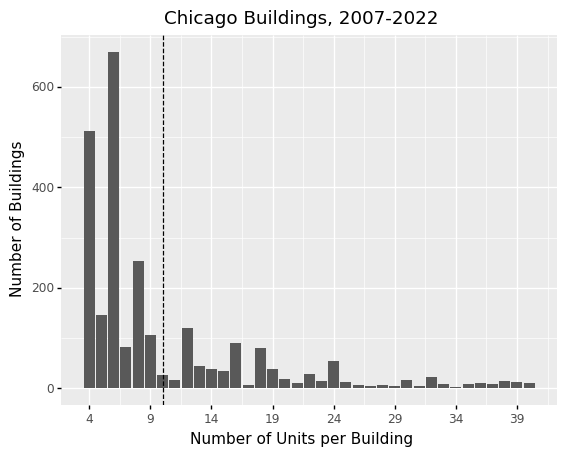

<ggplot: (8792763706359)>

In [220]:
plot_unit_dist(df_cc_2.query("Chicago==1&Age<=15"),"n_units",vline=10,
              title = 'Chicago Buildings, 2007-2022')

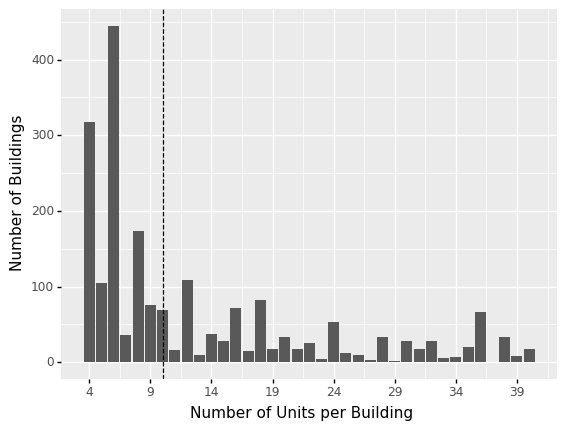

<ggplot: (8792938580941)>

In [221]:
plot_unit_dist(df_cc_2.query("Chicago==1&Age>15&Age<=30"),"n_units",vline=10)

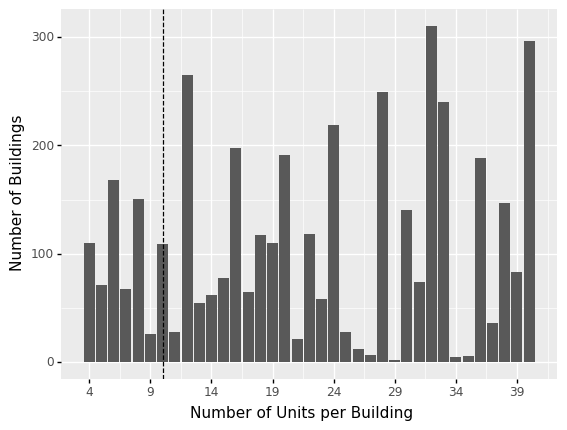

<ggplot: (8792933064473)>

In [222]:
plot_unit_dist(df_cc_2.query("Chicago==0&Age<=30"),"n_units",vline=10)